In [1]:
from chemlab.util.ml_data import MLData
from chemlab.util.modify_inp import qchem_out_aimd_multi
import numpy as np

In [4]:

prefix="/scratch/moriya/md/h2obpc/tmp_"

multi = qchem_out_aimd_multi()
multi.read_files([
    "/scratch/moriya/md/h2obpc/namd_single_nvt_2.out",
    "/scratch/moriya/md/h2obpc/namd_single_nvt.out"
])



# 转换成 kcal/mol, Angstrom, kcal/mol/Angstrom

multi.export_numpy(prefix=prefix,
                   energy_unit="kcal",
                   distance_unit="ang",
                   force_unit=("kcal", "ang"))




(array([[[13.6911139 , 14.50022421, 12.84346772],
         [ 8.45009367, 18.28693828, 15.91401166],
         [12.03603444, 19.60199643, 11.82511814],
         ...,
         [16.16363674,  6.42704768, 11.00008057],
         [15.41959865,  6.98115845,  9.42186508],
         [17.07940351,  7.20230535,  9.66986539]],
 
        [[13.69145409, 14.49879423, 12.84178809],
         [ 8.44111982, 18.2843672 , 15.90314254],
         [12.03617583, 19.59107557, 11.82844653],
         ...,
         [16.1736458 ,  6.42479089, 11.01172706],
         [15.38156572,  6.96199105,  9.43806012],
         [17.087869  ,  7.20845396,  9.67187361]],
 
        [[13.69212051, 14.4970108 , 12.83761102],
         [ 8.43189917, 18.28382269, 15.89256738],
         [12.03537376, 19.58071692, 11.83111549],
         ...,
         [16.18995941,  6.43723874, 11.00216588],
         [15.35394909,  6.94087   ,  9.45991462],
         [17.1142026 ,  7.21843373,  9.67078271]],
 
        ...,
 
        [[13.69987552, 14.49661018

In [9]:
from chemlab.util.ml_data import MLData
path="/scratch/moriya/md/h2obpc/"
test = MLData(prefix=f"{path}tmp_",files=["coord", "energy", "grad", "type"])
test.save_split(n_train=2000,n_val=400,n_test=1000,prefix=path)
test.export_xyz_from_split(split_file=f"{path}/split.npz", outdir=f"{path}raw_data", prefix_map=None)

Loaded dataset with 4000 frames, 162 atoms
Saved split to /scratch/moriya/md/h2obpc/split.npz (idx_train=2000, idx_val=400, idx_test=1000)
XYZ files exported to /scratch/moriya/md/h2obpc/raw_data


In [2]:
from pathlib import Path
from chemlab.util.modify_inp import single_spin_job
import subprocess
path="/scratch/moriya/md/h2obpc/"
ref = f"{path}ref.in"
for xyz_file in Path(f"{path}raw_data").glob('*.xyz'):
    tem = single_spin_job()
    tem.spins = 1
    tem.charge = 0
    tem.ref_name = ref
    tem.xyz_name = str(xyz_file)
    tem.generate_outputs(prefix=f"{path}raw_data/",new_file_name=xyz_file.name)
    #print(xyz_file)



generate:/scratch/moriya/md/h2obpc/raw_data/train_0955.inp
generate:/scratch/moriya/md/h2obpc/raw_data/train_0400.inp
generate:/scratch/moriya/md/h2obpc/raw_data/train_0220.inp
generate:/scratch/moriya/md/h2obpc/raw_data/train_1490.inp
generate:/scratch/moriya/md/h2obpc/raw_data/test_0456.inp
generate:/scratch/moriya/md/h2obpc/raw_data/train_1221.inp
generate:/scratch/moriya/md/h2obpc/raw_data/train_0726.inp
generate:/scratch/moriya/md/h2obpc/raw_data/val_0287.inp
generate:/scratch/moriya/md/h2obpc/raw_data/train_0627.inp
generate:/scratch/moriya/md/h2obpc/raw_data/train_1554.inp
generate:/scratch/moriya/md/h2obpc/raw_data/train_1470.inp
generate:/scratch/moriya/md/h2obpc/raw_data/train_1586.inp
generate:/scratch/moriya/md/h2obpc/raw_data/train_1535.inp
generate:/scratch/moriya/md/h2obpc/raw_data/test_0966.inp
generate:/scratch/moriya/md/h2obpc/raw_data/test_0459.inp
generate:/scratch/moriya/md/h2obpc/raw_data/train_0343.inp
generate:/scratch/moriya/md/h2obpc/raw_data/val_0008.inp
gene

In [3]:
# 1. 读取 (可扩展字段)
path = "./examples/tddft/phbdi/"
prefix = "./examples/tddft/phbdi/full_"
dataset = MLData(prefix=prefix, files=["coord","S1_energy","force","type"],energy_key="S1_energy")

# 2. 保存划分
train = 250
test = int(train/5)
val = int(train/5)
dataset.save_split(train, val, test, prefix=f"{path}{train}_")

# 3. 加载 split 并切片
split = np.load(f"{path}{train}_split.npz", allow_pickle=True)
train_data = dataset.get_split_data(split, part="idx_train")
val_data   = dataset.get_split_data(split, part="idx_val")
#energies = np.load(f"{prefix}energy.npy", allow_pickle=True)

Loaded dataset with 2800 frames, 27 atoms
Saved split to ./examples/tddft/phbdi/250_split.npz (idx_train=250, idx_val=50, idx_test=50)


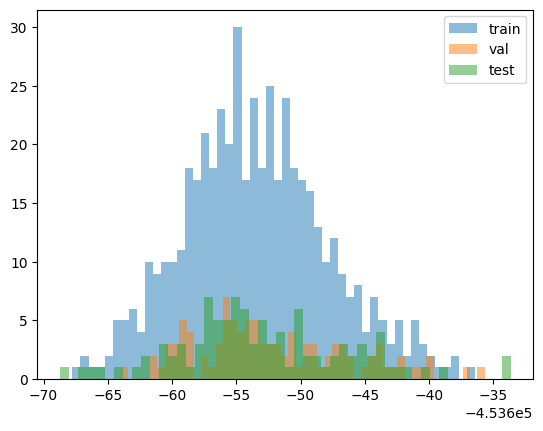

In [8]:
import matplotlib.pyplot as plt
path = "./examples/tddft/phbdi/"
prefix = "./examples/tddft/phbdi/full_"
train = 500
energies = np.load(f"{prefix}S1_energy.npy", allow_pickle=True)
split = np.load(f"{path}{train}_split.npz", allow_pickle=True)
plt.hist(energies[split["idx_train"]], bins=50, alpha=0.5, label="train")
plt.hist(energies[split["idx_val"]], bins=50, alpha=0.5, label="val")
plt.hist(energies[split["idx_test"]], bins=50, alpha=0.5, label="test")
plt.legend(); plt.show()
grads = np.load(f"{path}full_grad.npy")       # (N, Natoms, 3)
forces = np.load(f"{path}full_force.npy")       # (N, Natoms, 3)
#type = np.load(f"{path}full.npy")       # (N, Natoms, 3)


ΔE_ref vs ΔE_int correlation: -0.20391211747979474
Mean abs error: 0.029882074710401624


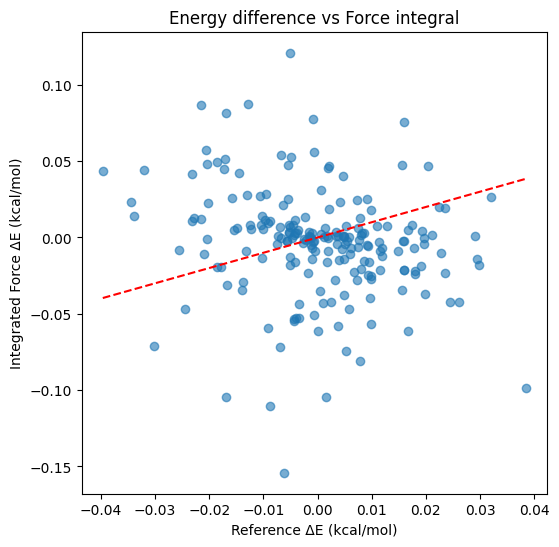

In [19]:
import numpy as np
import random
import matplotlib.pyplot as plt

# --- 加载数据 ---
coords = np.load(f"{path}full_coord.npy")     # (N, Natoms, 3)
energies = np.load(f"{path}full_energy.npy")  # (N,)
grads = np.load(f"{path}full_grad.npy")       # (N, Natoms, 3)

# 注意：如果 grads 存的是 dE/dR，需要取负号；如果 grads 已经是力，就不要取负
forces = grads   # 如果 full_grad 已经是力，请把这行改成 forces = grads

N = len(coords)

def energy_diff_from_forces(R0, R1, F0, F1):
    """用梯形规则积分力估算能量差"""
    dR = R1 - R0  # (Natoms, 3)
    work0 = np.sum(F0 * dR)
    work1 = np.sum(F1 * dR)
    return -0.5 * (work0 + work1)

# --- 随机取一些片段做对比 ---
ncheck = 200
idxs = random.sample(range(N-1), ncheck)

dE_ref = []
dE_int = []

for i in idxs:
    R0, R1 = coords[i], coords[i+1]
    E0, E1 = energies[i], energies[i+1]
    F0, F1 = forces[i], forces[i+1]

    dE_ref.append(E1 - E0)
    dE_int.append(energy_diff_from_forces(R0, R1, F0, F1))

dE_ref = np.array(dE_ref)
dE_int = np.array(dE_int)

# --- 打印统计 ---
corr = np.corrcoef(dE_ref, dE_int)[0,1]
mae = np.mean(np.abs(dE_ref - dE_int))
print("ΔE_ref vs ΔE_int correlation:", corr)
print("Mean abs error:", mae)

# --- 可视化 ---
plt.figure(figsize=(6,6))
plt.scatter(dE_ref, dE_int, alpha=0.6)
plt.plot([dE_ref.min(), dE_ref.max()], [dE_ref.min(), dE_ref.max()], "r--")
plt.xlabel("Reference ΔE (kcal/mol)")
plt.ylabel("Integrated Force ΔE (kcal/mol)")
plt.title("Energy difference vs Force integral")
plt.show()


In [8]:
from scipy.stats import linregress
import numpy as np

# 用你刚才脚本算出来的数组
slope, intercept, r, *_ = linregress(dE_ref, dE_int)
print("slope =", slope)  # 这就是比例 k，理想应为 1

slope = 1.0001433943855342


[pair 10->1234]  ΔE_ref=-2.461737e+01  ΔE_int=-1.668757e+01  (hartree)
Correlation = 0.2431,  MAE = 9.258530e+01


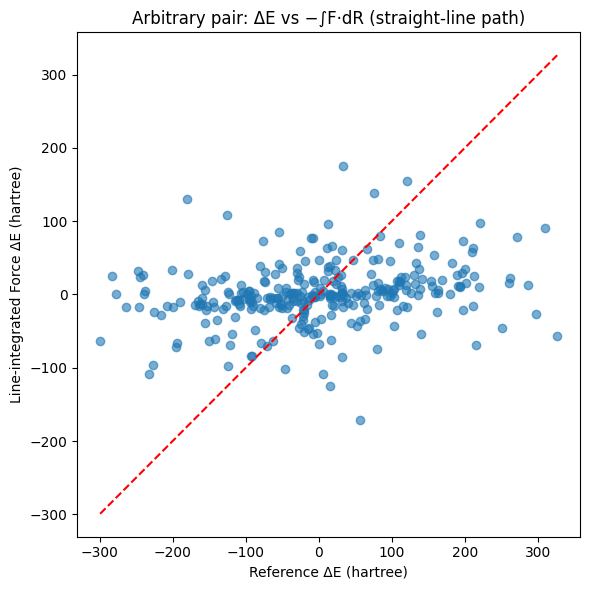

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import random


R = np.load(f"{path}full_coord.npy")        # (N, Natoms, 3)
E = np.load(f"{path}full_S1_energy.npy")* 14   # (N,)
G = np.load(f"{path}full_grad.npy")         # (N, Natoms, 3)

# 如果 G 存的是 dE/dR(梯度)，设为 True；如果已是力(−dE/dR)，设为 False
GRAD_IS_dEdR = True
F = -G if GRAD_IS_dEdR else G                  # (N, Natoms, 3)

# ====== Kabsch 刚体对齐（返回旋转矩阵与平移）======
def kabsch(P, Q):
    """
    P, Q: (Natoms, 3)  坐标；返回 R, t 使得 Q@R + t 对齐到 P
    """
    Pc = P - P.mean(axis=0)
    Qc = Q - Q.mean(axis=0)
    C = Qc.T @ Pc
    V, S, Wt = np.linalg.svd(C)
    d = np.sign(np.linalg.det(V @ Wt))
    D = np.diag([1.0, 1.0, d])
    Rmat = V @ D @ Wt
    t = P.mean(axis=0) - Q.mean(axis=0) @ Rmat
    return Rmat, t

def align_Q_to_P(P, Q, FQ=None):
    """
    把 Q 对齐到 P；若提供 FQ(力)，则一并旋转到同一坐标系。
    返回 Q_aligned, FQ_rot
    """
    Rmat, t = kabsch(P, Q)
    Q_aln = Q @ Rmat + t
    FQ_rot = FQ @ Rmat if FQ is not None else None
    return Q_aln, FQ_rot

# ====== 单对(i, j)的能量差与力积分 ======
def deltaE_by_pair(i, j, use_trapezoid=True):
    """
    返回 (ΔE_ref, ΔE_int) ；单位与你保存的文件一致（建议都在 hartree / Å）
    """
    Ri, Rj = R[i], R[j]
    Fi, Fj = F[i], F[j]

    # 刚体对齐第2帧坐标与力到第1帧坐标系
    Rj_aln, Fj_rot = align_Q_to_P(Ri, Rj, FQ=Fj)

    dR = Rj_aln - Ri  # (Natoms, 3)

    # 线积分近似（直线路径）：梯形规则或单点近似
    if use_trapezoid:
        work = -0.5 * (np.sum(Fi * dR) + np.sum(Fj_rot * dR))
    else:
        work = -np.sum(Fi * dR)  # 单点近似（用起点力）

    dE_ref = E[j] - E[i]
    dE_int = work
    return dE_ref, dE_int

# ====== 随机抽样多对做散点 ======
def scatter_random_pairs(n_pairs=300, use_trapezoid=True, seed=42):
    random.seed(seed)
    N = len(E)
    pairs = [tuple(sorted(random.sample(range(N), 2))) for _ in range(n_pairs)]
    dE_ref, dE_int = [], []
    for i, j in pairs:
        de_ref, de_int = deltaE_by_pair(i, j, use_trapezoid=use_trapezoid)
        dE_ref.append(de_ref); dE_int.append(de_int)
    dE_ref = np.array(dE_ref); dE_int = np.array(dE_int)

    corr = np.corrcoef(dE_ref, dE_int)[0, 1]
    mae = np.mean(np.abs(dE_ref - dE_int))
    print(f"Correlation = {corr:.4f},  MAE = {mae:.6e}")

    lo = min(dE_ref.min(), dE_int.min())
    hi = max(dE_ref.max(), dE_int.max())
    plt.figure(figsize=(6,6))
    plt.scatter(dE_ref, dE_int, alpha=0.6)
    plt.plot([lo, hi], [lo, hi], "r--")
    plt.xlabel("Reference ΔE (hartree)")
    plt.ylabel("Line-integrated Force ΔE (hartree)")
    plt.title("Arbitrary pair: ΔE vs −∫F·dR (straight-line path)")
    plt.tight_layout()
    plt.show()

# ====== 示例 ======
# 1) 指定两帧 i, j
i, j = 10, 1234
de_ref, de_int = deltaE_by_pair(i, j, use_trapezoid=True)
print(f"[pair {i}->{j}]  ΔE_ref={de_ref:.6e}  ΔE_int={de_int:.6e}  (hartree)")

# 2) 随机抽样若干对，画散点
scatter_random_pairs(n_pairs=300, use_trapezoid=True)


S1 energies shape: (2800,)
Transition dipole shape: (2800, 3)

=== 基本统计 ===
S1 energy: min=-453671.958, max=-453633.041, mean=-453653.184, std=5.876
|μ_trans|: min=0.003, max=3.581, mean=0.220, std=0.335
μ_x: min=-3.347, max=0.003, std=0.323
μ_y: min=-0.046, max=1.150, std=0.082
μ_z: min=-0.511, max=0.552, std=0.060


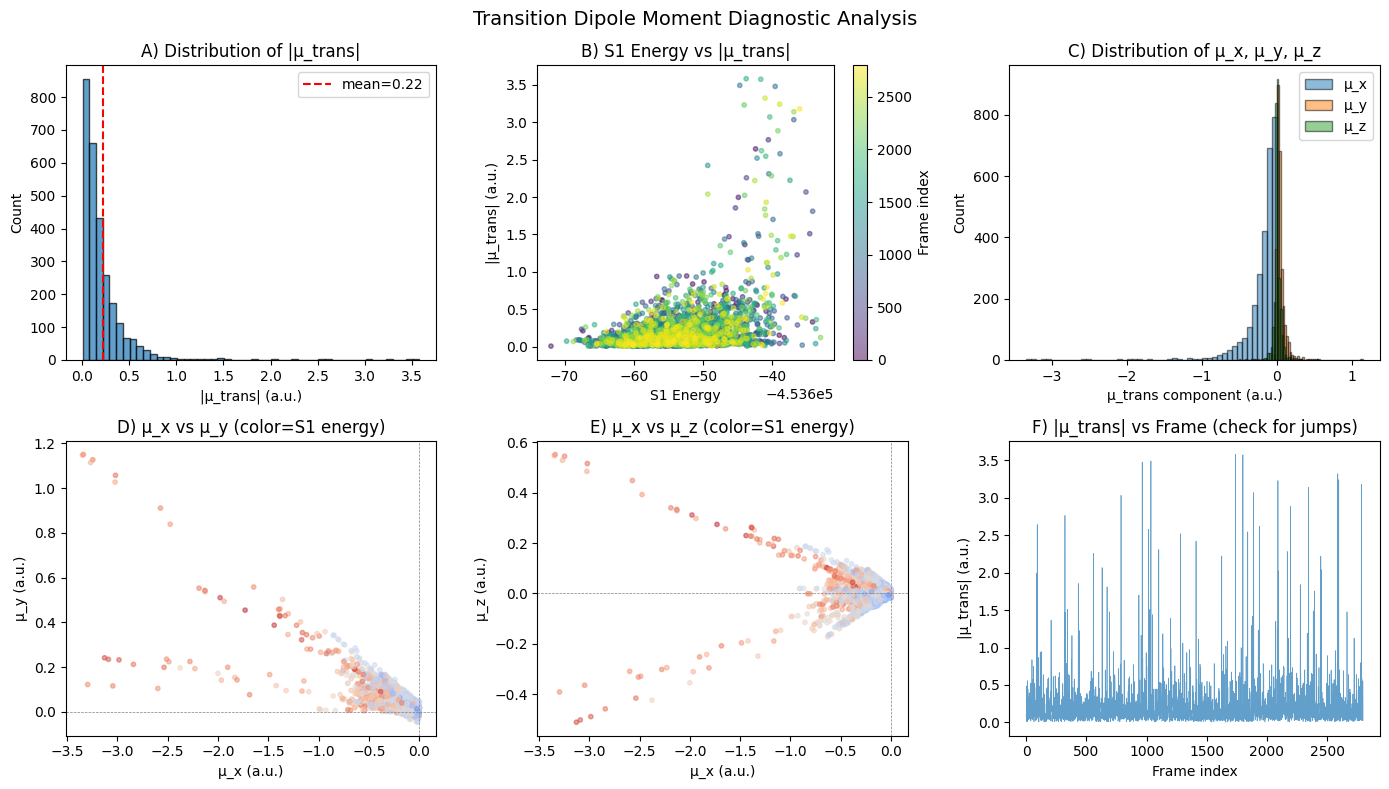


=== 检测到 28 个突变点 (Δ|μ| > 2.502) ===
  Frame 321: |μ|=0.020 → 2.765, Δ=2.745, S1_E=-453647.124
  Frame 322: |μ|=2.765 → 0.114, Δ=2.651, S1_E=-453640.575
  Frame 787: |μ|=0.042 → 3.033, Δ=2.992, S1_E=-453657.462
  Frame 788: |μ|=3.033 → 0.084, Δ=2.949, S1_E=-453636.898
  Frame 963: |μ|=0.034 → 3.478, Δ=3.444, S1_E=-453647.510
  Frame 964: |μ|=3.478 → 0.107, Δ=3.371, S1_E=-453639.591
  Frame 1016: |μ|=0.039 → 2.578, Δ=2.539, S1_E=-453662.663
  Frame 1035: |μ|=0.035 → 3.492, Δ=3.457, S1_E=-453661.518
  Frame 1036: |μ|=3.492 → 0.074, Δ=3.417, S1_E=-453644.703
  Frame 1737: |μ|=0.010 → 3.581, Δ=3.571, S1_E=-453653.899


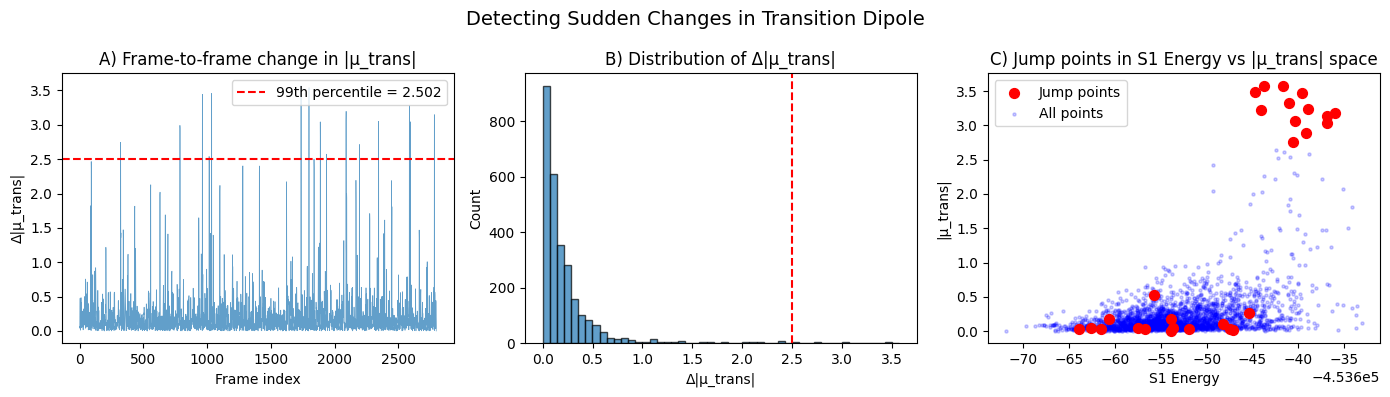


=== 多峰分布检测 ===
检测到 1 个峰:
  峰 1: |μ| ≈ 0.093

=== 分析完成，请查看生成的图片 ===


In [6]:
"""
诊断跃迁偶极矩预测问题的分析脚本
"""
import matplotlib.pyplot as plt
import numpy as np

# 加载数据
S1_energies = np.load("temdata/phbdi/full_ex_state_energy.npy")
transmom = np.load("temdata/phbdi/full_transmom.npy")  # (nframe, 3)

print(f"S1 energies shape: {S1_energies.shape}")
print(f"Transition dipole shape: {transmom.shape}")

# 计算跃迁偶极矩的模长
transmom_magnitude = np.linalg.norm(transmom, axis=1)

# 各分量
transmom_x = transmom[:, 0]
transmom_y = transmom[:, 1]
transmom_z = transmom[:, 2]

print(f"\n=== 基本统计 ===")
print(f"S1 energy: min={S1_energies.min():.3f}, max={S1_energies.max():.3f}, "
      f"mean={S1_energies.mean():.3f}, std={S1_energies.std():.3f}")
print(f"|μ_trans|: min={transmom_magnitude.min():.3f}, max={transmom_magnitude.max():.3f}, "
      f"mean={transmom_magnitude.mean():.3f}, std={transmom_magnitude.std():.3f}")
print(f"μ_x: min={transmom_x.min():.3f}, max={transmom_x.max():.3f}, std={transmom_x.std():.3f}")
print(f"μ_y: min={transmom_y.min():.3f}, max={transmom_y.max():.3f}, std={transmom_y.std():.3f}")
print(f"μ_z: min={transmom_z.min():.3f}, max={transmom_z.max():.3f}, std={transmom_z.std():.3f}")

# ============ 图1：整体分布诊断 ============
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
fig.suptitle('Transition Dipole Moment Diagnostic Analysis', fontsize=14)

# (0,0) 跃迁偶极矩模长直方图
axes[0,0].hist(transmom_magnitude, bins=50, edgecolor='black', alpha=0.7)
axes[0,0].set_xlabel('|μ_trans| (a.u.)')
axes[0,0].set_ylabel('Count')
axes[0,0].set_title('A) Distribution of |μ_trans|')
axes[0,0].axvline(transmom_magnitude.mean(), color='r', linestyle='--', label=f'mean={transmom_magnitude.mean():.2f}')
axes[0,0].legend()

# (0,1) S1能量 vs 跃迁偶极矩模长
sc = axes[0,1].scatter(S1_energies, transmom_magnitude, c=np.arange(len(S1_energies)),
                        cmap='viridis', alpha=0.5, s=10)
axes[0,1].set_xlabel('S1 Energy')
axes[0,1].set_ylabel('|μ_trans| (a.u.)')
axes[0,1].set_title('B) S1 Energy vs |μ_trans|')
plt.colorbar(sc, ax=axes[0,1], label='Frame index')

# (0,2) 各分量的直方图（叠加）
axes[0,2].hist(transmom_x, bins=50, alpha=0.5, label='μ_x', edgecolor='black')
axes[0,2].hist(transmom_y, bins=50, alpha=0.5, label='μ_y', edgecolor='black')
axes[0,2].hist(transmom_z, bins=50, alpha=0.5, label='μ_z', edgecolor='black')
axes[0,2].set_xlabel('μ_trans component (a.u.)')
axes[0,2].set_ylabel('Count')
axes[0,2].set_title('C) Distribution of μ_x, μ_y, μ_z')
axes[0,2].legend()

# (1,0) μ_x vs μ_y
axes[1,0].scatter(transmom_x, transmom_y, c=S1_energies, cmap='coolwarm', alpha=0.5, s=10)
axes[1,0].set_xlabel('μ_x (a.u.)')
axes[1,0].set_ylabel('μ_y (a.u.)')
axes[1,0].set_title('D) μ_x vs μ_y (color=S1 energy)')
axes[1,0].axhline(0, color='gray', linestyle='--', linewidth=0.5)
axes[1,0].axvline(0, color='gray', linestyle='--', linewidth=0.5)

# (1,1) μ_x vs μ_z
axes[1,1].scatter(transmom_x, transmom_z, c=S1_energies, cmap='coolwarm', alpha=0.5, s=10)
axes[1,1].set_xlabel('μ_x (a.u.)')
axes[1,1].set_ylabel('μ_z (a.u.)')
axes[1,1].set_title('E) μ_x vs μ_z (color=S1 energy)')
axes[1,1].axhline(0, color='gray', linestyle='--', linewidth=0.5)
axes[1,1].axvline(0, color='gray', linestyle='--', linewidth=0.5)

# (1,2) 跃迁偶极矩随时间/帧的变化
axes[1,2].plot(transmom_magnitude, alpha=0.7, linewidth=0.5)
axes[1,2].set_xlabel('Frame index')
axes[1,2].set_ylabel('|μ_trans| (a.u.)')
axes[1,2].set_title('F) |μ_trans| vs Frame (check for jumps)')

plt.tight_layout()
plt.savefig('transition_dipole_diagnostic.png', dpi=150)
plt.show()

# ============ 图2：检测突变/跳跃 ============
fig2, axes2 = plt.subplots(1, 3, figsize=(14, 4))
fig2.suptitle('Detecting Sudden Changes in Transition Dipole', fontsize=14)

# 计算相邻帧之间的变化
delta_magnitude = np.abs(np.diff(transmom_magnitude))
delta_x = np.abs(np.diff(transmom_x))
delta_y = np.abs(np.diff(transmom_y))
delta_z = np.abs(np.diff(transmom_z))

# 找出突变点
threshold_magnitude = np.percentile(delta_magnitude, 99)
jump_indices = np.where(delta_magnitude > threshold_magnitude)[0]

axes2[0].plot(delta_magnitude, alpha=0.7, linewidth=0.5)
axes2[0].axhline(threshold_magnitude, color='r', linestyle='--', label=f'99th percentile = {threshold_magnitude:.3f}')
axes2[0].set_xlabel('Frame index')
axes2[0].set_ylabel('Δ|μ_trans|')
axes2[0].set_title('A) Frame-to-frame change in |μ_trans|')
axes2[0].legend()

axes2[1].hist(delta_magnitude, bins=50, edgecolor='black', alpha=0.7)
axes2[1].axvline(threshold_magnitude, color='r', linestyle='--')
axes2[1].set_xlabel('Δ|μ_trans|')
axes2[1].set_ylabel('Count')
axes2[1].set_title('B) Distribution of Δ|μ_trans|')

# 在突变点附近的详细信息
if len(jump_indices) > 0:
    print(f"\n=== 检测到 {len(jump_indices)} 个突变点 (Δ|μ| > {threshold_magnitude:.3f}) ===")
    for i, idx in enumerate(jump_indices[:10]):  # 只显示前10个
        print(f"  Frame {idx}: |μ|={transmom_magnitude[idx]:.3f} → {transmom_magnitude[idx+1]:.3f}, "
              f"Δ={delta_magnitude[idx]:.3f}, S1_E={S1_energies[idx]:.3f/}")

    # 在图(1,2)上标记突变点
    axes2[2].scatter(S1_energies[jump_indices], transmom_magnitude[jump_indices],
                     c='red', s=50, label='Jump points', zorder=5)
    axes2[2].scatter(S1_energies, transmom_magnitude, c='blue', alpha=0.2, s=5, label='All points')
    axes2[2].set_xlabel('S1 Energy')
    axes2[2].set_ylabel('|μ_trans|')
    axes2[2].set_title('C) Jump points in S1 Energy vs |μ_trans| space')
    axes2[2].legend()
else:
    axes2[2].text(0.5, 0.5, 'No significant jumps detected',
                  transform=axes2[2].transAxes, ha='center', va='center')

plt.tight_layout()
plt.savefig('transition_dipole_jumps.png', dpi=150)
plt.show()

# ============ 额外诊断：检查是否有多峰分布 ============
print("\n=== 多峰分布检测 ===")
# 简单的方法：检查是否有明显的聚类
from scipy import stats

# 检查|μ|的分布是否有多峰
# 使用核密度估计
try:
    from scipy.stats import gaussian_kde
    kde = gaussian_kde(transmom_magnitude)
    x_eval = np.linspace(transmom_magnitude.min(), transmom_magnitude.max(), 200)
    density = kde(x_eval)

    # 找局部极大值
    from scipy.signal import find_peaks
    peaks, _ = find_peaks(density, height=0.1*density.max())

    print(f"检测到 {len(peaks)} 个峰:")
    for i, peak in enumerate(peaks):
        print(f"  峰 {i+1}: |μ| ≈ {x_eval[peak]:.3f}")

    if len(peaks) > 1:
        print("\n⚠️ 警告：跃迁偶极矩分布呈多峰，这可能表明存在态特征变化！")
        print("   建议：检查这些不同峰对应的构型特征")
except ImportError:
    print("scipy not available for KDE analysis")

print("\n=== 分析完成，请查看生成的图片 ===")

(2800, 27, 3) (2800, 27)


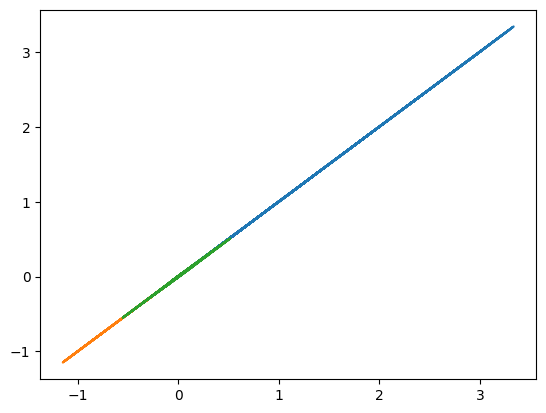

In [27]:
charge = np.load("temdata/phbdi/full_aligned_td.npy")
dipole = -np.load("temdata/phbdi/full_transmom.npy")
coords = np.load("temdata/phbdi/full_coord.npy")

from chemlab.util.unit import DISTANCE
coords = DISTANCE(coords).convert_to("bohr")
print(coords.shape,charge.shape)
pred_dp = np.einsum("ijk,ij->ik",coords,charge)
plt.plot(pred_dp,dipole)

In [28]:
print(coords)

[[[-3.07697207e+00 -6.15931569e+00 -8.06811237e-01]
  [-9.20667376e-03 -3.66482169e+00  1.29949733e-01]
  [-2.22933650e+00 -2.07403687e+00 -5.80545829e-02]
  ...
  [ 7.85234543e+00 -9.82398540e+00  2.93790361e+00]
  [ 1.09282652e+01 -2.38477230e+00  1.90225488e+00]
  [ 1.17919684e+01 -7.48567581e+00  2.41652109e+00]]

 [[-3.23368179e+00 -5.91643333e+00 -5.46610548e-01]
  [ 1.21428293e-01 -3.65103774e+00  3.33202482e-01]
  [-1.84551738e+00 -1.81801957e+00 -1.79211719e-01]
  ...
  [ 7.62256041e+00 -1.02112002e+01 -3.10312334e-01]
  [ 1.11526267e+01 -3.38010412e+00  2.47347506e+00]
  [ 1.20268407e+01 -7.72853212e+00  4.52158200e-01]]

 [[-3.25460360e+00 -6.15429922e+00 -2.26754356e-01]
  [ 2.83893159e-01 -4.20065821e+00  2.71119720e-01]
  [-1.64626581e+00 -2.29047778e+00  1.16512301e-01]
  ...
  [ 7.28015966e+00 -1.09741398e+01 -4.78983119e-01]
  [ 1.14112512e+01 -3.96599497e+00  1.20917292e-01]
  [ 1.16911642e+01 -8.92757350e+00 -5.99862163e-01]]

 ...

 [[-4.23348403e+00 -6.17020742e+00

In [5]:
import numpy as np
tddft_data = np.load("full_tddft.npz")
tddft_data["coords"].shape


(2800, 27, 3)

In [9]:
import numpy as np

npz_path = "full_tddft.npz"  # 改成你的路径
data = np.load(npz_path, allow_pickle=True)

print("Keys:", data.files)

# 尝试拿到常用字段（如果你文件里名字略有不同，这里会直接报 KeyError，你再按 keys 改一下即可）
gs_E = data["gs_energies"]  # (nframes,) Hartree
ex_E = data["excitation_energies"]  # (nframes, n_excited) eV
tot_E = data["total_energies"]  # (nframes, n_excited) Hartree

print("gs_energies:", gs_E.shape, "Hartree")
print("excitation_energies:", ex_E.shape, "eV")
print("total_energies:", tot_E.shape, "Hartree")

# S1/S2 激发能（eV）
S1 = ex_E[:, 0]
S2 = ex_E[:, 1] if ex_E.shape[1] >= 2 else None

print("S1 (eV): min/mean/max =", np.nanmin(S1), np.nanmean(S1), np.nanmax(S1))
if S2 is not None:
    print("S2 (eV): min/mean/max =", np.nanmin(S2), np.nanmean(S2), np.nanmax(S2))


Keys: ['coords', 'atom_symbols', 'qm_type', 'gs_energies', 'gs_dipoles', 'gs_esp_charges', 'excitation_energies', 'total_energies', 'osc_strengths', 'trans_moms', 'esp_charges_excited', 'esp_trans_density', 'gradients', 'n_frames', 'n_atoms', 'n_excited', 'state_indices', 'idx_train', 'idx_val', 'idx_test']
gs_energies: (2800,) Hartree
excitation_energies: (2800, 5) eV
total_energies: (2800, 5) Hartree
S1 (eV): min/mean/max = 2.7252 3.225984428571428 3.554
S2 (eV): min/mean/max = 3.327 3.5908349642857136 3.7785


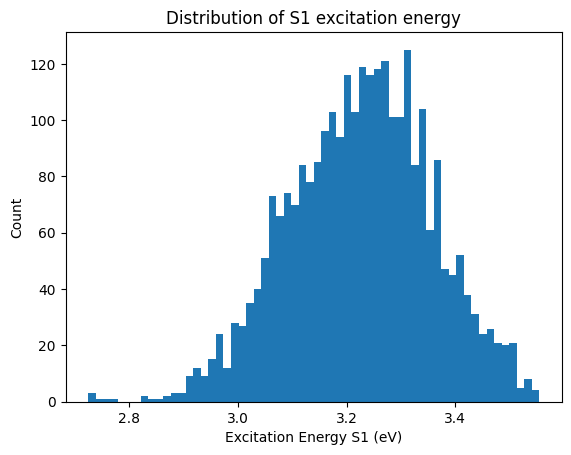

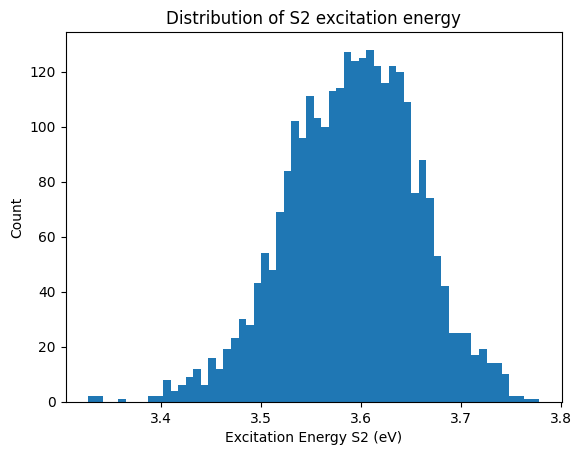

In [10]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(S1[~np.isnan(S1)], bins=60)
plt.xlabel("Excitation Energy S1 (eV)")
plt.ylabel("Count")
plt.title("Distribution of S1 excitation energy")
plt.show()

if S2 is not None:
    plt.figure()
    plt.hist(S2[~np.isnan(S2)], bins=60)
    plt.xlabel("Excitation Energy S2 (eV)")
    plt.ylabel("Count")
    plt.title("Distribution of S2 excitation energy")
    plt.show()


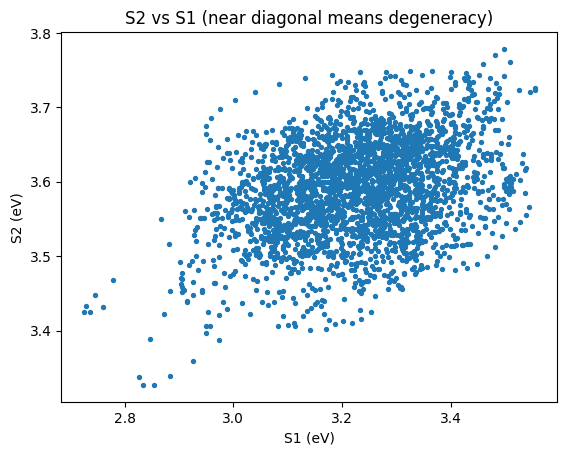

In [11]:
if S2 is not None:
    plt.figure()
    ok = (~np.isnan(S1)) & (~np.isnan(S2))
    plt.scatter(S1[ok], S2[ok], s=8)
    plt.xlabel("S1 (eV)")
    plt.ylabel("S2 (eV)")
    plt.title("S2 vs S1 (near diagonal means degeneracy)")
    plt.show()


Near-degenerate frames: 3 / 2800  (|S2-S1| < 0.02 eV)
frame   1889 : S1=3.537200 eV, S2=3.555400 eV, dE=0.018200 eV
frame   1938 : S1=3.517900 eV, S2=3.535900 eV, dE=0.018000 eV
frame   2588 : S1=3.527300 eV, S2=3.546300 eV, dE=0.019000 eV


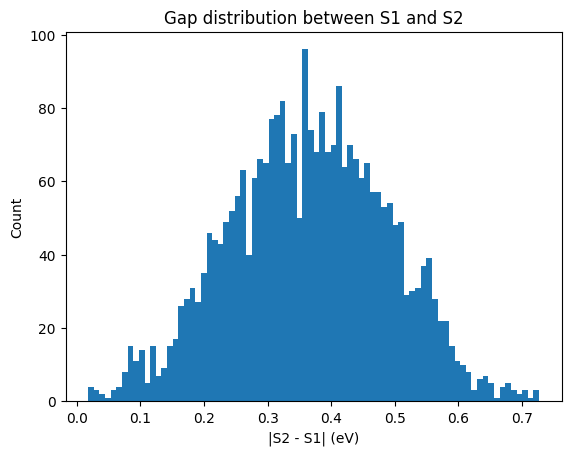

In [12]:
if S2 is not None:
    dE = np.abs(S2 - S1)

    # 你可以改这个阈值：0.01 eV = 10 meV
    thr = 0.02
    mask = (~np.isnan(dE)) & (dE < thr)
    idx_deg = np.where(mask)[0]

    print(f"Near-degenerate frames: {len(idx_deg)} / {len(S1)}  (|S2-S1| < {thr} eV)")
    if len(idx_deg) > 0:
        # 打印前20个
        for k in idx_deg[:20]:
            print(f"frame {k:6d} : S1={S1[k]:.6f} eV, S2={S2[k]:.6f} eV, dE={dE[k]:.6f} eV")
if S2 is not None:
    plt.figure()
    plt.hist(dE[~np.isnan(dE)], bins=80)
    plt.xlabel("|S2 - S1| (eV)")
    plt.ylabel("Count")
    plt.title("Gap distribution between S1 and S2")
    plt.show()


In [13]:
coords = data["coords"]  # (nframes, natoms, 3) Angstrom
atom_symbols = data["atom_symbols"] if "atom_symbols" in data.files else None

if S2 is not None and len(idx_deg) > 0:
    coords_deg = coords[idx_deg]  # (n_deg, natoms, 3)
    np.save("near_degenerate_coords.npy", coords_deg)
    np.save("near_degenerate_indices.npy", idx_deg)
    print("Saved: near_degenerate_coords.npy, near_degenerate_indices.npy")


Saved: near_degenerate_coords.npy, near_degenerate_indices.npy


In [14]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("full_tddft.npz", allow_pickle=True)

ex_E = data["excitation_energies"]        # (nframes, n_excited) eV
mu = data["trans_moms"]                   # (nframes, n_excited, 3) transition dipole (au)

S1_E = ex_E[:, 0]
S2_E = ex_E[:, 1]

mu1 = mu[:, 0, :]   # (nframes, 3) S0->S1
mu2 = mu[:, 1, :]   # (nframes, 3) S0->S2

mu1_norm = np.linalg.norm(mu1, axis=1)
mu2_norm = np.linalg.norm(mu2, axis=1)

gap = np.abs(S2_E - S1_E)

print("mu1_norm:", np.nanmin(mu1_norm), np.nanmean(mu1_norm), np.nanmax(mu1_norm))
print("mu2_norm:", np.nanmin(mu2_norm), np.nanmean(mu2_norm), np.nanmax(mu2_norm))
print("gap (eV): ", np.nanmin(gap), np.nanmean(gap), np.nanmax(gap))


mu1_norm: 0.0029899832775452106 0.22034467862766624 3.5805840920162733
mu2_norm: 1.9285526101198278 4.21674663327516 4.554569020225734
gap (eV):  0.017999999999999794 0.3648505357142857 0.7269000000000001


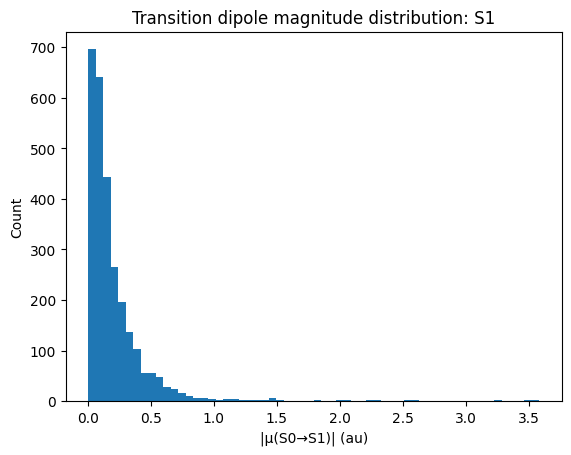

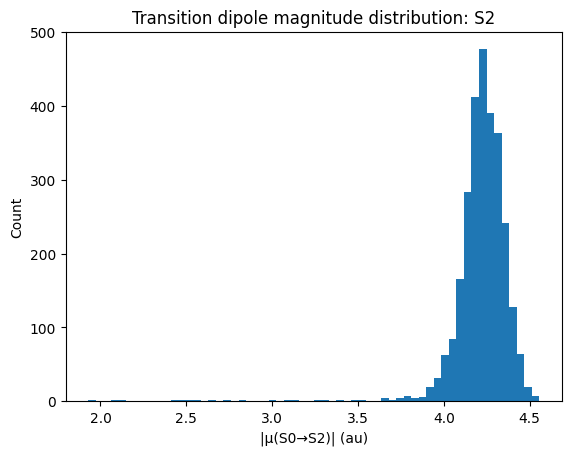

In [15]:
plt.figure()
plt.hist(mu1_norm[~np.isnan(mu1_norm)], bins=60)
plt.xlabel("|μ(S0→S1)| (au)")
plt.ylabel("Count")
plt.title("Transition dipole magnitude distribution: S1")
plt.show()

plt.figure()
plt.hist(mu2_norm[~np.isnan(mu2_norm)], bins=60)
plt.xlabel("|μ(S0→S2)| (au)")
plt.ylabel("Count")
plt.title("Transition dipole magnitude distribution: S2")
plt.show()


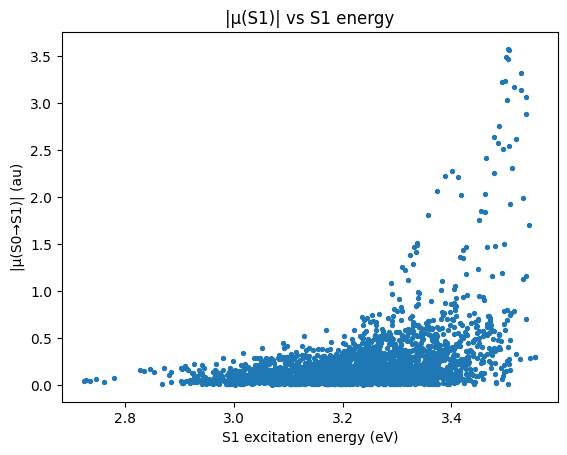

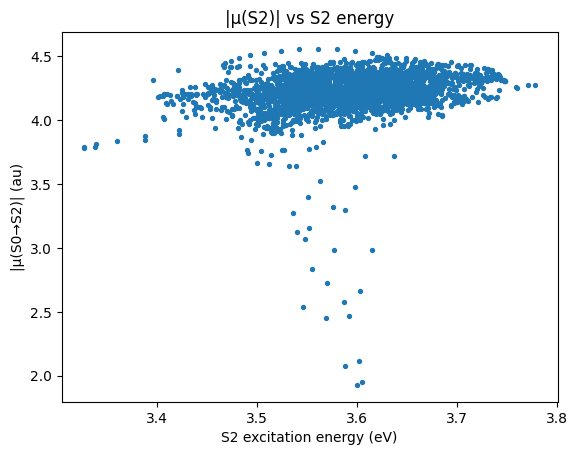

In [16]:
ok1 = (~np.isnan(S1_E)) & (~np.isnan(mu1_norm))
ok2 = (~np.isnan(S2_E)) & (~np.isnan(mu2_norm))

plt.figure()
plt.scatter(S1_E[ok1], mu1_norm[ok1], s=8)
plt.xlabel("S1 excitation energy (eV)")
plt.ylabel("|μ(S0→S1)| (au)")
plt.title("|μ(S1)| vs S1 energy")
plt.show()

plt.figure()
plt.scatter(S2_E[ok2], mu2_norm[ok2], s=8)
plt.xlabel("S2 excitation energy (eV)")
plt.ylabel("|μ(S0→S2)| (au)")
plt.title("|μ(S2)| vs S2 energy")
plt.show()


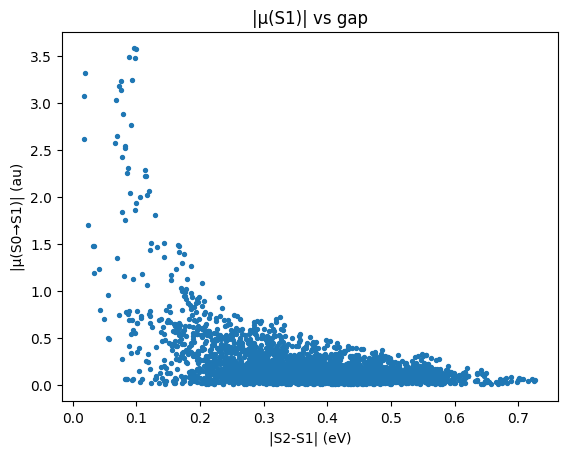

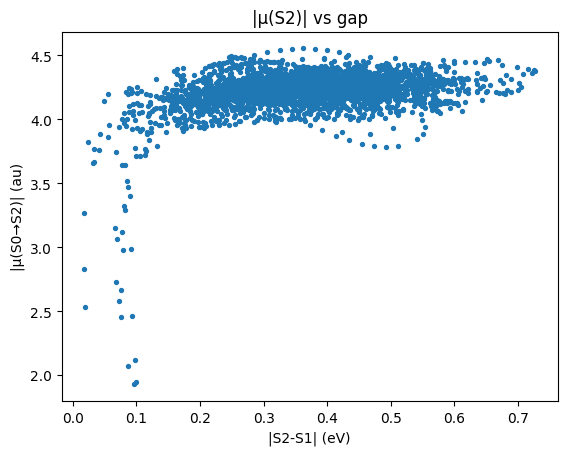

In [17]:
okg = (~np.isnan(gap)) & (~np.isnan(mu1_norm)) & (~np.isnan(mu2_norm))

plt.figure()
plt.scatter(gap[okg], mu1_norm[okg], s=8)
plt.xlabel("|S2-S1| (eV)")
plt.ylabel("|μ(S0→S1)| (au)")
plt.title("|μ(S1)| vs gap")
plt.show()

plt.figure()
plt.scatter(gap[okg], mu2_norm[okg], s=8)
plt.xlabel("|S2-S1| (eV)")
plt.ylabel("|μ(S0→S2)| (au)")
plt.title("|μ(S2)| vs gap")
plt.show()


frames with gap < 0.05 eV: 10


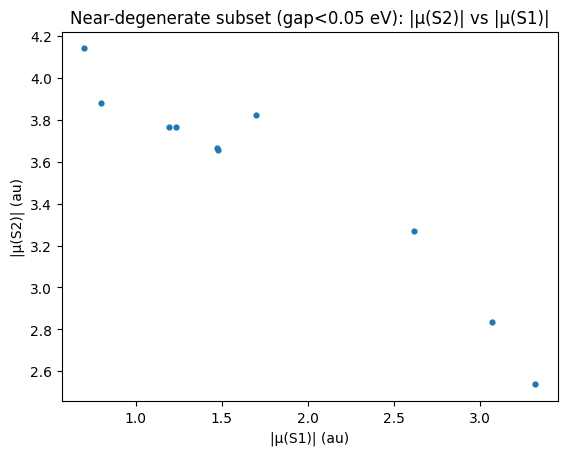

frame    936: gap=0.0233 eV  S1=3.5428  S2=3.5661  |mu1|=1.7009  |mu2|=3.8248
frame   1889: gap=0.0182 eV  S1=3.5372  S2=3.5554  |mu1|=3.0700  |mu2|=2.8341
frame   1928: gap=0.0418 eV  S1=3.4483  S2=3.4901  |mu1|=1.2334  |mu2|=3.7645
frame   1938: gap=0.0180 eV  S1=3.5179  S2=3.5359  |mu1|=2.6187  |mu2|=3.2706
frame   2038: gap=0.0486 eV  S1=3.5367  S2=3.5853  |mu1|=0.7013  |mu2|=4.1419
frame   2335: gap=0.0337 eV  S1=3.4932  S2=3.5269  |mu1|=1.1916  |mu2|=3.7666
frame   2387: gap=0.0339 eV  S1=3.4657  S2=3.4996  |mu1|=1.4724  |mu2|=3.6641
frame   2588: gap=0.0190 eV  S1=3.5273  S2=3.5463  |mu1|=3.3214  |mu2|=2.5371
frame   2665: gap=0.0315 eV  S1=3.4807  S2=3.5122  |mu1|=1.4770  |mu2|=3.6582
frame   2779: gap=0.0425 eV  S1=3.5019  S2=3.5444  |mu1|=0.7966  |mu2|=3.8833


In [18]:
thr = 0.05
mask = okg & (gap < thr)
idx = np.where(mask)[0]
print(f"frames with gap < {thr} eV: {len(idx)}")

# 对这些点：画 μ2 vs μ1，看是否出现“交换”（例如一部分点 μ1大μ2小，另一部分反过来）
plt.figure()
plt.scatter(mu1_norm[idx], mu2_norm[idx], s=12)
plt.xlabel("|μ(S1)| (au)")
plt.ylabel("|μ(S2)| (au)")
plt.title(f"Near-degenerate subset (gap<{thr} eV): |μ(S2)| vs |μ(S1)|")
plt.show()

# 同时把前20个打印出来，方便你定位构型
for k in idx[:20]:
    print(f"frame {k:6d}: gap={gap[k]:.4f} eV  "
          f"S1={S1_E[k]:.4f}  S2={S2_E[k]:.4f}  "
          f"|mu1|={mu1_norm[k]:.4f}  |mu2|={mu2_norm[k]:.4f}")


In [32]:
dark_dipole = np.load("dark_dipole.npy")
dark_charge = np.load("dark_charge.npy")
bright_dipole = np.load("bright_dipole.npy")
bright_charge = np.load("bright_charge.npy")
dark_dipole,dark_charge

(array([[-0.1052,  0.0199, -0.013 ],
        [-0.0233,  0.0495,  0.0082],
        [-0.1101,  0.0402, -0.0092],
        ...,
        [-0.1205,  0.0382,  0.0399],
        [-0.0119, -0.0178, -0.0182],
        [-0.0233,  0.0146, -0.0061]]),
 array([[ 0.1523909,  0.1907585,  0.1139096, ...,  0.2048086,  0.1576727,
         -0.005738 ],
        [ 0.500442 ,  0.082215 ,  0.3513724, ...,  0.2000969,  0.1853683,
         -0.051451 ],
        [ 0.2948435,  0.0262775,  0.2412085, ...,  0.2166725,  0.2081112,
         -0.0762285],
        ...,
        [ 0.3820175, -0.13733  ,  0.336513 , ...,  0.1902679,  0.1444211,
          0.0067496],
        [ 0.3322516,  0.0077153,  0.2348285, ...,  0.2187215,  0.1973709,
         -0.0218373],
        [ 0.3907585, -0.0110654,  0.3535947, ...,  0.1945749,  0.1528268,
          0.010884 ]]))

In [15]:
import numpy as np

data = np.load("full_tddft.npz", allow_pickle=True)

mu  = data["trans_moms"]          # (nframes,nexc,3)
qex = data["esp_trans_density"]   # (nframes,nexc,natoms)
R   = data["coords"]              # (nframes,natoms,3) Angstrom (按你的导出注释)

# 如果你要用 Bohr，一定要 R 和 μ 的单位一致才有物理意义；
# 但我们这里仅用来决定“正负号”，单位不重要，只要全程一致即可。
# 建议先中心化，避免原点影响（虽然transition density一般总和~0，但数值更稳）
R0 = R - R.mean(axis=1, keepdims=True)

mu1 = mu[:,0,:]; mu2 = mu[:,1,:]
m1 = np.linalg.norm(mu1, axis=1)
m2 = np.linalg.norm(mu2, axis=1)
bright_is_S2 = (m2 > m1)

bright_mu = np.where(bright_is_S2[:,None], mu2, mu1)
dark_mu   = np.where(bright_is_S2[:,None], mu1, mu2)
bright_q  = np.where(bright_is_S2[:,None], qex[:,1,:], qex[:,0,:])
dark_q    = np.where(bright_is_S2[:,None], qex[:,0,:], qex[:,1,:])

def phase_lock(mu_vec, q_atom, R_centered):
    """
    Make (mu_vec, q_atom) phase-consistent frame-by-frame:
    if mu_pred · ref < 0 => flip both mu and q.
    """
    mu_pred = np.einsum("faj,f a->fj", R_centered, q_atom)  # (frames,3)

    # choose reference direction from first non-zero predicted dipole
    ref = None
    for i in range(len(mu_pred)):
        if np.linalg.norm(mu_pred[i]) > 1e-12:
            ref = mu_pred[i].copy()
            break
    if ref is None:
        # all zero? just return as-is
        return mu_vec, q_atom

    out_mu = mu_vec.copy()
    out_q  = q_atom.copy()

    for i in range(len(mu_pred)):
        if np.linalg.norm(mu_pred[i]) < 1e-12:
            continue
        if np.dot(ref, mu_pred[i]) < 0:
            out_mu[i] *= -1.0
            out_q[i]  *= -1.0

    return out_mu, out_q

bright_mu_al, bright_q_al = phase_lock(bright_mu, bright_q, R0)
dark_mu_al,   dark_q_al   = phase_lock(dark_mu,   dark_q,   R0)

np.save("bright_dipole.npy", bright_mu_al)
np.save("dark_dipole.npy",   dark_mu_al)
np.save("bright_charge.npy", bright_q_al)
np.save("dark_charge.npy",   dark_q_al)
np.save("bright_is_S2.npy",  bright_is_S2.astype(np.int8))


In [16]:
dark_dipole = np.load("dark_dipole.npy")
dark_charge = np.load("dark_charge.npy")
bright_dipole = np.load("bright_dipole.npy")
bright_charge = np.load("bright_charge.npy")
dark_dipole,bright_dipole

(array([[-0.1052,  0.0199, -0.013 ],
        [-0.0233,  0.0495,  0.0082],
        [-0.1101,  0.0402, -0.0092],
        ...,
        [-0.1205,  0.0382,  0.0399],
        [-0.0119, -0.0178, -0.0182],
        [-0.0233,  0.0146, -0.0061]]),
 array([[ 4.1539, -0.7845,  0.9592],
        [ 4.1606, -0.9422,  0.4896],
        [ 4.068 , -1.1388,  0.0219],
        ...,
        [ 3.8851, -1.3876, -0.9117],
        [ 4.0108, -1.5121, -0.9884],
        [ 4.1529, -1.3069, -0.0117]]))

(2800, 27, 3) (2800, 27)


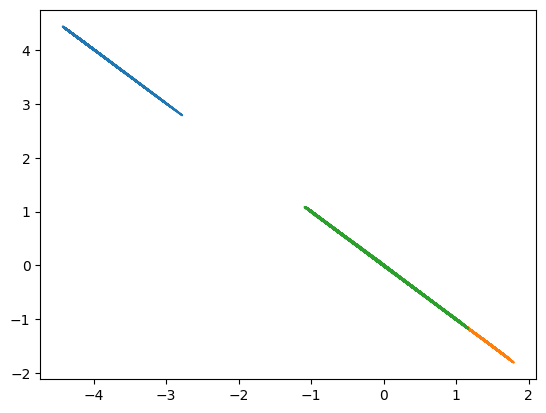

In [17]:
import matplotlib.pyplot as plt

charge = bright_charge
dipole = bright_dipole
coords = np.load("temdata/phbdi/full_coord.npy")

from chemlab.util.unit import DISTANCE
coords = DISTANCE(coords).convert_to("bohr")
print(coords.shape,charge.shape)
pred_dp = np.einsum("ijk,ij->ik",coords,charge)
plt.plot(pred_dp,dipole)